In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import metrics

import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

# ------------------------------------------------------

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/insurance_data.csv',error_bad_lines=False )
data.tail()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
59376,79142,1,D1,10,0.230769,2,3,1,0.074627,0.709091,...,0,0,0,0,0,0,0,0,0,4
59377,79143,1,D3,26,0.230769,2,3,1,0.432836,0.800000,...,0,0,0,0,0,0,0,0,0,7
59378,79144,1,E1,26,0.076923,2,3,1,0.104478,0.745455,...,0,0,0,0,0,0,0,0,0,8
59379,79145,1,D2,10,0.230769,2,3,1,0.507463,0.690909,...,1,0,0,0,0,0,0,0,0,8
59380,79146,1,A8,26,0.076923,2,3,1,0.447761,0.781818,...,0,0,0,0,0,0,0,0,0,7


In [4]:
data.columns

Index(['Id', 'Product_Info_1', 'Product_Info_2', 'Product_Info_3',
       'Product_Info_4', 'Product_Info_5', 'Product_Info_6', 'Product_Info_7',
       'Ins_Age', 'Ht',
       ...
       'Medical_Keyword_40', 'Medical_Keyword_41', 'Medical_Keyword_42',
       'Medical_Keyword_43', 'Medical_Keyword_44', 'Medical_Keyword_45',
       'Medical_Keyword_46', 'Medical_Keyword_47', 'Medical_Keyword_48',
       'Response'],
      dtype='object', length=128)

In [5]:
data.shape

(59381, 128)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 58.0+ MB


In [7]:
data.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,39507.211515,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,...,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,5.636837
std,22815.883089,0.160191,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,...,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,2.456833
min,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19780.000000,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,39487.000000,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,59211.000000,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,79146.000000,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [8]:
data.columns

Index(['Id', 'Product_Info_1', 'Product_Info_2', 'Product_Info_3',
       'Product_Info_4', 'Product_Info_5', 'Product_Info_6', 'Product_Info_7',
       'Ins_Age', 'Ht',
       ...
       'Medical_Keyword_40', 'Medical_Keyword_41', 'Medical_Keyword_42',
       'Medical_Keyword_43', 'Medical_Keyword_44', 'Medical_Keyword_45',
       'Medical_Keyword_46', 'Medical_Keyword_47', 'Medical_Keyword_48',
       'Response'],
      dtype='object', length=128)

In [9]:
data.iloc[:, : 50].columns

Index(['Id', 'Product_Info_1', 'Product_Info_2', 'Product_Info_3',
       'Product_Info_4', 'Product_Info_5', 'Product_Info_6', 'Product_Info_7',
       'Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1', 'Employment_Info_2',
       'Employment_Info_3', 'Employment_Info_4', 'Employment_Info_5',
       'Employment_Info_6', 'InsuredInfo_1', 'InsuredInfo_2', 'InsuredInfo_3',
       'InsuredInfo_4', 'InsuredInfo_5', 'InsuredInfo_6', 'InsuredInfo_7',
       'Insurance_History_1', 'Insurance_History_2', 'Insurance_History_3',
       'Insurance_History_4', 'Insurance_History_5', 'Insurance_History_7',
       'Insurance_History_8', 'Insurance_History_9', 'Family_Hist_1',
       'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5',
       'Medical_History_1', 'Medical_History_2', 'Medical_History_3',
       'Medical_History_4', 'Medical_History_5', 'Medical_History_6',
       'Medical_History_7', 'Medical_History_8', 'Medical_History_9',
       'Medical_History_10', 'Medical_Histor

In [10]:
data.iloc[:, : 50].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Data columns (total 50 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   59381 non-null  int64  
 1   Product_Info_1       59381 non-null  int64  
 2   Product_Info_2       59381 non-null  object 
 3   Product_Info_3       59381 non-null  int64  
 4   Product_Info_4       59381 non-null  float64
 5   Product_Info_5       59381 non-null  int64  
 6   Product_Info_6       59381 non-null  int64  
 7   Product_Info_7       59381 non-null  int64  
 8   Ins_Age              59381 non-null  float64
 9   Ht                   59381 non-null  float64
 10  Wt                   59381 non-null  float64
 11  BMI                  59381 non-null  float64
 12  Employment_Info_1    59362 non-null  float64
 13  Employment_Info_2    59381 non-null  int64  
 14  Employment_Info_3    59381 non-null  int64  
 15  Employment_Info_4    52602 non-null 

In [11]:
data['Insurance_History_3'].corr(data.Response)

0.007177222270971562

In [12]:
# check if the data is balanced or imbalanced
print(data['Response'].value_counts())

8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: Response, dtype: int64


In [13]:
# check for null values 

data.isnull().sum()[data.isnull().sum()>0]

Employment_Info_1         19
Employment_Info_4       6779
Employment_Info_6      10854
Insurance_History_5    25396
Family_Hist_2          28656
Family_Hist_3          34241
Family_Hist_4          19184
Family_Hist_5          41811
Medical_History_1       8889
Medical_History_10     58824
Medical_History_15     44596
Medical_History_24     55580
Medical_History_32     58274
dtype: int64

In [14]:
data.Medical_History_2.unique()

array([112, 412,   3, 350, 162, 491, 600, 145,  16, 628, 434, 161, 335,
       613, 261, 568, 407, 132, 565,  33, 156, 202, 366, 140, 444,  57,
        81,  14, 617,  63, 317, 155, 373,  58, 198, 453, 428, 610, 125,
       354, 478, 177, 245, 253, 441, 569, 528, 515, 276,  48,  52, 166,
       217, 280, 362, 404,  34, 390, 180, 349, 579, 123, 632, 408, 378,
       181, 121, 418, 306, 446, 171,  42, 106, 497, 353, 160, 204, 615,
       192, 352, 577, 570, 122, 387, 249, 501, 278, 483,  96, 621, 220,
       466, 262,  79, 403, 633, 272, 484, 228, 182, 379, 307,  20, 447,
       564, 477, 230, 109, 287, 430, 205, 413, 415, 129, 260, 298, 368,
       421, 164, 274, 548, 519,  43,  22, 330, 571, 561, 437, 153, 383,
       459, 509,  41, 120, 258, 116, 265, 506, 631,   7,  82, 624,  84,
       522, 480,  68, 461, 190, 152, 151, 514, 416, 575, 391, 526, 108,
       518, 277, 581, 567,  47, 320, 534, 468,  21, 609,  35, 432, 627,
       566, 255, 371, 370, 264, 191, 641, 175,   1, 212, 499, 28

In [15]:
a=data[data.Employment_Info_1.isnull()]

data[data.Employment_Info_1.isnull()].Employment_Info_1=1.9
data['Employment_Info_1'].isnull().sum()

19

               features  missing_count  missing_count_percentage
0     Employment_Info_1             19                  0.031997
1     Employment_Info_4           6779                 11.416110
2     Employment_Info_6          10854                 18.278574
3   Insurance_History_5          25396                 42.767889
4         Family_Hist_2          28656                 48.257860
5         Family_Hist_3          34241                 57.663226
6         Family_Hist_4          19184                 32.306630
7         Family_Hist_5          41811                 70.411411
8     Medical_History_1           8889                 14.969435
9    Medical_History_10          58824                 99.061990
10   Medical_History_15          44596                 75.101463
11   Medical_History_24          55580                 93.598963
12   Medical_History_32          58274                 98.135767


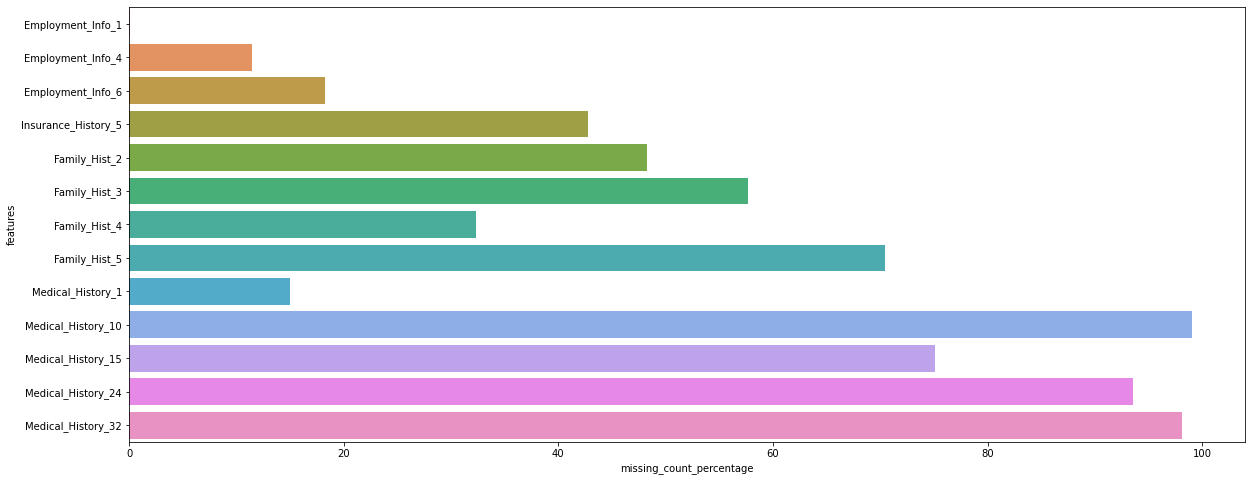

In [16]:
# Lets draw a bar graph to visualize percentage of missing features in train set
missing= data.isnull().sum()[data.isnull().sum() !=0]

missing=pd.DataFrame(missing.reset_index())

missing.rename(columns={'index':'features',0:'missing_count'},inplace=True)
missing['missing_count_percentage']=((missing['missing_count'])/59381)*100
plt.figure(figsize=(20,8))
sns.barplot(y=missing['features'],x=missing['missing_count_percentage'])
print(missing)
#Looking at below bar grah- 
#Medical_Hist_32/24/15/10 , Family_hist_5 are top five features with huge amount of missing data ( imputaion to these might not be fruitful - I will drop these features)

In [17]:
data[missing['features']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Employment_Info_1    59362 non-null  float64
 1   Employment_Info_4    52602 non-null  float64
 2   Employment_Info_6    48527 non-null  float64
 3   Insurance_History_5  33985 non-null  float64
 4   Family_Hist_2        30725 non-null  float64
 5   Family_Hist_3        25140 non-null  float64
 6   Family_Hist_4        40197 non-null  float64
 7   Family_Hist_5        17570 non-null  float64
 8   Medical_History_1    50492 non-null  float64
 9   Medical_History_10   557 non-null    float64
 10  Medical_History_15   14785 non-null  float64
 11  Medical_History_24   3801 non-null   float64
 12  Medical_History_32   1107 non-null   float64
dtypes: float64(13)
memory usage: 5.9 MB


Employment_Info_1_4_6 Insurance_History_5 Family_Hist_2-3-4-5 are continous features .

The following variables are discrete: Medical_History_1, Medical_History_10, Medical_History_15, Medical_History_24, Medical_History_32

remove rows with missing values and see model performance
impute missing values with mean and median or may be mode.

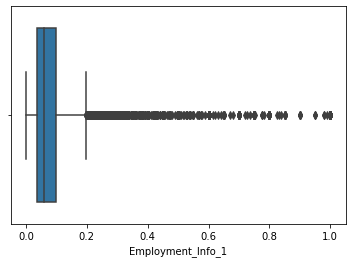

In [18]:
# Lets see spread of data before we impute missing values
plt.plot(figsize=(15,10))
sns.boxplot(data['Employment_Info_1'])
# Employment_Info_1 seems to have lots of outliers - Median should be right to impute missing values

In [19]:
data['Employment_Info_1'].isna().sum()

19

In [20]:
data['Employment_Info_1'].median()

0.06

In [21]:
data['Employment_Info_1'].fillna(data['Employment_Info_1'].median(),inplace=True) 
# imputing with Meadian , as there are lots of Outliers 


In [22]:
data['Employment_Info_1'].isna().sum()

0

In [23]:
data['Employment_Info_1'].describe()

count    59381.000000
mean         0.077576
std          0.082334
min          0.000000
25%          0.035000
50%          0.060000
75%          0.100000
max          1.000000
Name: Employment_Info_1, dtype: float64

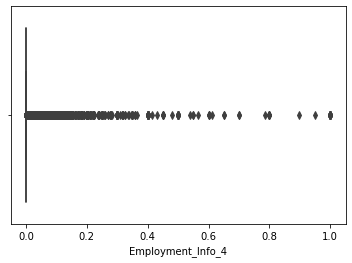

In [24]:
sns.boxplot(data['Employment_Info_4'])
# ['Employment_Info_4'] is has most of the values centered close to zero , also huge presence of outliers 

In [25]:
data['Employment_Info_4'].fillna(data.Employment_Info_4.median(),inplace=True)

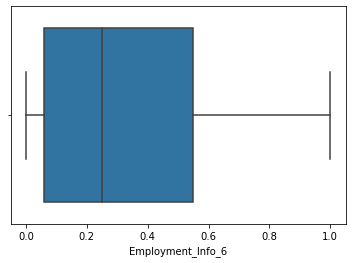

In [26]:
sns.boxplot(data['Employment_Info_6'])
#No outlieers - mean should be rigth candidate to impute missing values

In [27]:
data['Employment_Info_6'].fillna(data.Employment_Info_6.mean(),inplace=True)

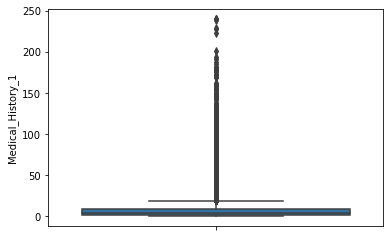

In [28]:
data['Medical_History_1'].isnull().sum()
sns.boxplot(y=data['Medical_History_1'])

In [29]:
data['Medical_History_1'].fillna(data['Medical_History_1'].median(),inplace=True)
data['Medical_History_1'].isnull().sum()

0

In [30]:
#lets drop features with high number of missing values 
data.drop(['Medical_History_10','Medical_History_15','Medical_History_24','Medical_History_32','Family_Hist_3','Family_Hist_5','Family_Hist_2','Family_Hist_4'],axis=1,inplace=True)

In [31]:
data.columns

Index(['Id', 'Product_Info_1', 'Product_Info_2', 'Product_Info_3',
       'Product_Info_4', 'Product_Info_5', 'Product_Info_6', 'Product_Info_7',
       'Ins_Age', 'Ht',
       ...
       'Medical_Keyword_40', 'Medical_Keyword_41', 'Medical_Keyword_42',
       'Medical_Keyword_43', 'Medical_Keyword_44', 'Medical_Keyword_45',
       'Medical_Keyword_46', 'Medical_Keyword_47', 'Medical_Keyword_48',
       'Response'],
      dtype='object', length=120)

In [32]:
data.isnull().sum()[data.isnull().sum()!=0]

Insurance_History_5    25396
dtype: int64

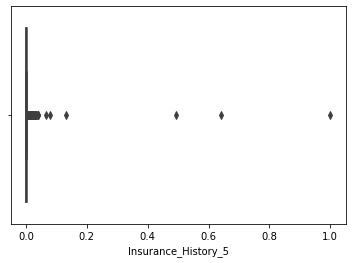

In [33]:
sns.boxplot(data.Insurance_History_5)

In [34]:
data.Insurance_History_5.fillna(data.Insurance_History_5.median(),inplace=True)

In [35]:
data.isnull().sum()[data.isnull().sum()!=0]

Series([], dtype: int64)

In [36]:
data.isnull().sum()
#All missing NA values has been treated

Id                    0
Product_Info_1        0
Product_Info_2        0
Product_Info_3        0
Product_Info_4        0
                     ..
Medical_Keyword_45    0
Medical_Keyword_46    0
Medical_Keyword_47    0
Medical_Keyword_48    0
Response              0
Length: 120, dtype: int64

In [37]:
#Using Pearson Correlation
#plt.figure(figsize=(12,10))
cor = data.corr()
cor_target=abs(cor['Response'])
#print(cor_target)
relevant_features=cor_target[cor_target>0.2]
relevant_features
#sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
#plt.show()

Product_Info_4        0.202434
Ins_Age               0.209610
Wt                    0.351395
BMI                   0.381601
Medical_History_4     0.239896
Medical_History_23    0.286584
Medical_History_39    0.220176
Medical_Keyword_3     0.257706
Medical_Keyword_15    0.259169
Response              1.000000
Name: Response, dtype: float64

In [38]:
mh=('Medical_History_1', 'Medical_History_2', 'Medical_History_3', 'Medical_History_4', 'Medical_History_5', 'Medical_History_6','Medical_History_7', 'Medical_History_8', 'Medical_History_9', 'Medical_History_11', 'Medical_History_12')

data[set(mh)].corr()
#data['Medical_History_1'].corr(data['Medical_History_2'])

,Medical_History_2,Medical_History_6,Medical_History_9,Medical_History_8,Medical_History_3,Medical_History_5,Medical_History_1,Medical_History_12,Medical_History_4,Medical_History_7,Medical_History_11
Medical_History_2,1.000000,-0.003745,-0.038769,0.013783,-0.003485,0.012053,0.051541,0.014591,-0.013331,0.009132,-0.010676
Medical_History_6,-0.003745,1.000000,0.054622,-0.053952,-0.012913,-0.013710,0.048776,-0.062284,0.065822,0.013766,0.004532
Medical_History_9,-0.038769,0.054622,1.000000,-0.095099,-0.047936,-0.022577,0.050196,-0.080079,0.056725,0.008751,0.019634
Medical_History_8,0.013783,-0.053952,-0.095099,1.000000,0.026606,0.013284,-0.042726,0.095977,-0.026925,-0.450764,-0.013255
Medical_History_3,-0.003485,-0.012913,-0.047936,0.026606,1.000000,0.000227,-0.015535,0.036681,0.037736,-0.000156,-0.003267
Medical_History_5,0.012053,-0.013710,-0.022577,0.013284,0.000227,1.000000,-0.006863,0.018044,-0.009563,0.004136,-0.002688
Medical_History_1,0.051541,0.048776,0.050196,-0.042726,-0.015535,-0.006863,1.000000,-0.031521,0.002901,0.024459,0.003082
Medical_History_12,0.014591,-0.062284,-0.080079,0.095977,0.036681,0.018044,-0.031521,1.000000,-0.045059,-0.038998,-0.017029
Medical_History_4,-0.013331,0.065822,0.056725,-0.026925,0.037736,-0.009563,0.002901,-0.045059,1.000000,-0.005221,0.011029
Medical_History_7,0.009132,0.013766,0.008751,-0.450764,-0.000156,0.004136,0.024459,-0.038998,-0.005221,1.000000,0.001530


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 120 entries, Id to Response
dtypes: float64(10), int64(109), object(1)
memory usage: 54.4+ MB


In [40]:
data.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [41]:
data.Product_Info_2.unique()

array(['D3', 'A1', 'E1', 'D4', 'D2', 'A8', 'A2', 'D1', 'A7', 'A6', 'A3',
       'A5', 'C4', 'C1', 'B2', 'C3', 'C2', 'A4', 'B1'], dtype=object)

In [42]:
#from sklearn.preprocessing import LabelEncoder
#le=LabelEncoder()
#data['Product_Info_2']=le.fit_transform(data['Product_Info_2'])

from sklearn.preprocessing import LabelEncoder
#le=LabelEncoder()
#data['Product_Info_2']=le.fit_transform(data['Product_Info_2'])


data = pd.get_dummies(data, columns=['Product_Info_2'])
print(data)

          Id  Product_Info_1  Product_Info_3  Product_Info_4  Product_Info_5  \
0          2               1              10        0.076923               2   
1          5               1              26        0.076923               2   
2          6               1              26        0.076923               2   
3          7               1              10        0.487179               2   
4          8               1              26        0.230769               2   
...      ...             ...             ...             ...             ...   
59376  79142               1              10        0.230769               2   
59377  79143               1              26        0.230769               2   
59378  79144               1              26        0.076923               2   
59379  79145               1              10        0.230769               2   
59380  79146               1              26        0.076923               2   

       Product_Info_6  Product_Info_7  

In [43]:
data.head()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Product_Info_2_B2,Product_Info_2_C1,Product_Info_2_C2,Product_Info_2_C3,Product_Info_2_C4,Product_Info_2_D1,Product_Info_2_D2,Product_Info_2_D3,Product_Info_2_D4,Product_Info_2_E1
0,2,1,10,0.076923,2,1,1,0.641791,0.581818,0.148536,...,0,0,0,0,0,0,0,1,0,0
1,5,1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,...,0,0,0,0,0,0,0,0,0,0
2,6,1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,...,0,0,0,0,0,0,0,0,0,1
3,7,1,10,0.487179,2,3,1,0.164179,0.672727,0.205021,...,0,0,0,0,0,0,0,0,1,0
4,8,1,26,0.230769,2,3,1,0.417910,0.654545,0.234310,...,0,0,0,0,0,0,1,0,0,0


# Model development taking all the columns

In [44]:
# feature meatrix and response vector seperation
X=data.iloc[:,0:-1]
y=data['Response']
X.drop('Id',axis=1,inplace=True)


In [45]:
print('Shape of X is :', X.shape)
print('Shape of y is :',y.shape)

Shape of X is : (59381, 136)
Shape of y is : (59381,)


## Split Data in Train Test

In [102]:
#splitting the data into 80% train and 20% test

from sklearn.model_selection import train_test_split

def split(X,y):
    return train_test_split(X,y, test_size=0.25, random_state=25, shuffle=True)

X_train, X_test, y_train, y_test=split(X,y)

In [103]:
print('Shape of X_train is :', X_train.shape)
print('Shape of y_train is :',y_train.shape)

Shape of X_train is : (44535, 136)
Shape of y_train is : (44535,)


In [104]:
print('Shape of X_test is :', X_test.shape)
print('Shape of y_test is :',y_test.shape)

Shape of X_test is : (14846, 136)
Shape of y_test is : (14846,)


In [110]:
# check if the train data covers all classes
y_train.unique()

array([6, 8, 2, 5, 1, 7, 4, 3])

In [105]:
# check if the test data covers all classes 
y_test.unique()

array([8, 6, 2, 5, 1, 7, 3, 4])

In [111]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score,GridSearchCV


## Model 1 - Decision Tree

In [148]:
# Using a Decision Tree classifier without any attributes
from sklearn.tree import DecisionTreeClassifier
DT1=DecisionTreeClassifier()
model_DT1=DT1.fit(X_train,y_train)
y_pred=model_DT1.predict(X_test)
print("Accuracy with all default: " , accuracy_score(y_test,y_pred))

Accuracy with all default:  1.0


In [150]:
# Using a Decision Tree classifier with Random_state, Criterion 
from sklearn.tree import DecisionTreeClassifier
DT2=DecisionTreeClassifier(random_state = 0, criterion='entropy')
model_DT2=DT2.fit(X_train,y_train)
y_pred=model_DT2.predict(X_test)
print("Accuracy with Entropy: " ,accuracy_score(y_test,y_pred))

Accuracy with Entropy:  1.0


In [147]:
# Using a Decision Tree classifier with Random_state, Criterion , max_depth
from sklearn.tree import DecisionTreeClassifier
DT2=DecisionTreeClassifier(random_state = 0, criterion='entropy', max_depth=4)
model_DT2=DT2.fit(X_train,y_train)
y_pred=model_DT2.predict(X_test)
print("Accuracy with Entropy and max_dept=4 : " ,accuracy_score(y_test,y_pred))

Accuracy with Entropy and max_dept=4 :  0.9812744173514751


## Model 2 - Decision Tree Classifier with GridSearchCV


In [153]:
# Using a Decision Tree classifier with GridSearchCV
from sklearn.tree import DecisionTreeClassifier
param_grid={'max_depth':range(1,20,2)}
DT=DecisionTreeClassifier()
clf_DT=GridSearchCV(DT,param_grid,cv=10,scoring='accuracy',n_jobs=-1).fit(X_train,y_train)
model_DT=clf_DT.fit(X_train,y_train)
y_pred=model_DT.predict(X_test)
print("Accuracy with GridSearchCV: " ,accuracy_score(y_test,y_pred))

Accuracy with GridSearchCV:  1.0


## Model 3 - Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(random_state = 0)

In [53]:
model2 = RandomForestClassifier(criterion='entropy',
                                n_estimators=6,
                                random_state = 0,
                                max_depth=3,
                                min_samples_split=5,
                                min_samples_leaf=4,
                                max_leaf_nodes=5,
                                n_jobs=-1,
                                )

In [54]:
model1.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [55]:
model2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=5,
                       min_samples_leaf=4, min_samples_split=5, n_estimators=6,
                       n_jobs=-1, random_state=0)

# Using the model for prediction

In [56]:
prediction1 = pd.DataFrame()
prediction1 = model1.predict(X_test)

In [57]:
prediction2 = pd.DataFrame()
prediction2 = model2.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data with model 1 is:',accuracy_score(y_test, prediction1))
print('Accuracy score for test data with model 2 is:',accuracy_score(y_test, prediction2))

Accuracy score for test data with model 1 is: 0.9424914747610829
Accuracy score for test data with model 2 is: 0.40980086725887255


In [59]:
from sklearn.metrics import confusion_matrix
print('Confusion matrix for test data with model 1 is:\n',confusion_matrix(y_test, prediction1))
print('Confusion matrix for test data with model 2 is:\n',confusion_matrix(y_test, prediction2))

Confusion matrix for test data with model 1 is:
 [[2314   81    0    4   18   25    1    0]
 [ 106 2344    1   13   33   90    1    0]
 [  17  180   96   35   31   51    0    0]
 [  13   97   12  350    6   81    1    0]
 [  15  142    1   24 1699  213    3    0]
 [   1    6    0    0    0 4501    0    0]
 [   0    1    0    0    0   60 3188    0]
 [   0    0    0    0    0    0    3 7895]]
Confusion matrix for test data with model 2 is:
 [[ 212   21    0    0   43  606    0 1561]
 [   1  274    0    0   65  734    0 1514]
 [   0    2    0    0   12  144    0  252]
 [   0    0    0    0    0   36    0  524]
 [   0   76    0    0  131  850    0 1040]
 [   0  103    0    0    0 1298    0 3107]
 [   0    2    0    0    0  598    0 2649]
 [   0    1    0    0    0   78    0 7819]]


In [60]:
from sklearn.metrics import f1_score
print('F1_score for test data using model1 is:',f1_score(y_test, prediction1,average='micro'))
print('F1_score for test data using model2 is:',f1_score(y_test, prediction2, average='micro'))

F1_score for test data using model1 is: 0.9424914747610829
F1_score for test data using model2 is: 0.40980086725887255


In [61]:
from sklearn.metrics import precision_score
precision1 = precision_score(y_test,prediction1,average='micro')
print('Precision score for test data using model1 is:', precision1)
precision2 = precision_score(y_test,prediction2,average='micro')
print('Precision score for test data using model2 is:', precision2)


Precision score for test data using model1 is: 0.9424914747610829
Precision score for test data using model2 is: 0.40980086725887255


In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction1))

              precision    recall  f1-score   support

           1       0.94      0.95      0.94      2443
           2       0.82      0.91      0.86      2588
           3       0.87      0.23      0.37       410
           4       0.82      0.62      0.71       560
           5       0.95      0.81      0.87      2097
           6       0.90      1.00      0.94      4508
           7       1.00      0.98      0.99      3249
           8       1.00      1.00      1.00      7898

    accuracy                           0.94     23753
   macro avg       0.91      0.81      0.84     23753
weighted avg       0.94      0.94      0.94     23753



## Logistics Regression

In [180]:
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression(penalty='l2',multi_class='auto')
logis.fit(X_train, y_train)
y_pred = logis.predict(X_test)
logit_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy score for the Logistic model:', logit_accuracy)

Accuracy score for the Logistic model: 0.6363330189950155


## KNN

In [181]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=133, p=2, metric='minkowski')
knn.fit(X_train, y_train)
y_preds = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_preds)
print('Accuracy score for the KNN model:', knn_accuracy)

Accuracy score for the KNN model: 0.48733665633840767


# End of Model development taking all columns 

# *******************************************************************************************
<hr>

# Feature reduction 

In [154]:
#Using Pearson Correlation
#plt.figure(figsize=(12,10))
cor = data.corr()
cor_target=abs(cor['Response'])
#print(cor_target)
relevant_features=cor_target[cor_target>0.2]
relevant_features
#sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
#plt.show()

Product_Info_4        0.202434
Ins_Age               0.209610
Wt                    0.351395
BMI                   0.381601
Medical_History_4     0.239896
Medical_History_23    0.286584
Medical_History_39    0.220176
Medical_Keyword_3     0.257706
Medical_Keyword_15    0.259169
Response              1.000000
Name: Response, dtype: float64

In [155]:
# based on output of Pearson Correlation - select only columns with cor >0.2

cols=['Product_Info_4','Ins_Age','Wt','BMI','Medical_History_4','Medical_History_23','Medical_History_39','Medical_Keyword_3','Medical_Keyword_15']

#cols1=['Product_Info_4','Wt','BMI']
XR=data[cols]
yr=data['Response']



In [156]:
print('Shape of X is :', XR.shape)
print('Shape of y is :',yr.shape)

Shape of X is : (59381, 9)
Shape of y is : (59381,)


In [157]:
#splitting the data into 80% train and 20% test

from sklearn.model_selection import train_test_split

def split(XR,yr):
    return train_test_split(XR,yr, test_size=0.3, random_state=0)

XR_train, XR_test, yr_train, yr_test=split(XR,yr)

In [158]:
print('Shape of X_train is :', XR_train.shape)
print('Shape of y_train is :',yr_train.shape)

Shape of X_train is : (41566, 9)
Shape of y_train is : (41566,)


In [159]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score,GridSearchCV


In [178]:
from sklearn.tree import DecisionTreeClassifier

DT=DecisionTreeClassifier(max_depth=8)
model_DT=DT.fit(XR_train,yr_train)
yr_pred=model_DT.predict(XR_test)
print(accuracy_score(yr_test,yr_pred))

0.5127140050519226


In [179]:
# Using a Decision Tree classifier 
from sklearn.tree import DecisionTreeClassifier
param_grid={'max_depth':range(1,20,2)}
DT=DecisionTreeClassifier()
clf_DT=GridSearchCV(DT,param_grid,cv=10,scoring='accuracy',n_jobs=-1).fit(XR_train,yr_train)
yr_pred=clf_DT.predict(XR_test)
print(accuracy_score(yr_test,yr_pred))

0.5094021891664328


In [69]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(random_state = 0)

In [70]:
model3.fit(XR_train,yr_train)

RandomForestClassifier(random_state=0)

In [71]:
prediction3 = pd.DataFrame()
prediction3 = model3.predict(XR_test)

In [72]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data with model 1 is:',accuracy_score(yr_test, prediction3))

Accuracy score for test data with model 1 is: 0.46887454392365985


In [73]:
from sklearn.metrics import precision_score
precision3 = precision_score(yr_test,prediction3,average='micro')
print('Precision score for test data using model1 is:', precision3)

Precision score for test data using model1 is: 0.46887454392365985
